MainProcess


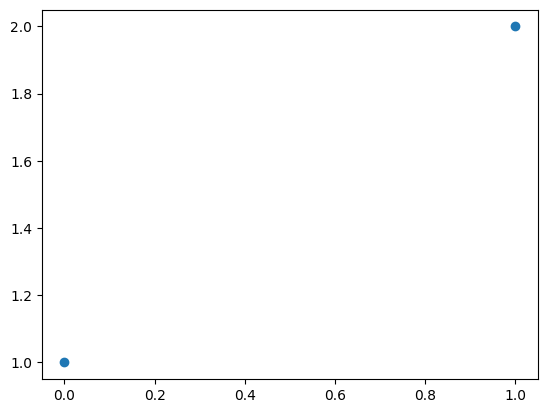

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
#Prepare datasets
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 101
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.close_mosaic = 1000000
model.step1Labels.cos_lr = False
model.step1Labels.lrf = 1.0
model.step1Labels.patience = 0
model.step1Labels.mixup = 0.0

In [ ]:
model.train(loaded_data.train_data, loaded_data.test_data)
fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
import shutil
shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
fls.dill_save(fls.temp_dir + '/intermediate_weights/model.pickle', model)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.130 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=100, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/flagellar/temp/training.yaml, degre

train: Scanning /flagellar/temp/yolo_dataset/labels/train.cache... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████| 2994/2994 [00:00<?, ?it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1515.2±856.4 MB/s, size: 77.2 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val.cache... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<?, ?it/s]


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 101 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/101      4.82G      2.729      3.953      1.251          9        640: 100%|██████████| 249/249 [00:22<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.76it/s]

                   all        393        369      0.523      0.363      0.406       0.11


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/101      5.69G       2.08       1.61      1.054          8        640: 100%|██████████| 249/249 [00:20<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.38it/s]

                   all        393        369       0.75      0.707      0.711      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/101      5.69G      2.009      1.502       1.03         11        640:  63%|██████▎   | 156/249 [00:12<00:07, 12.37it/s]

In [ ]:
import ultralytics
import time
test_data = loaded_data.test_data
data_list = []
times = []
epoch_list = np.arange(25,51,50)
for epoch in epoch_list:
    t=time.time()
    model = fls.dill_load(fls.temp_dir + '/intermediate_weights/model.pickle')
    model.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
    model.step1Labels.concentration = 2
    model.run_in_parallel=True
    data_list.append(model.infer(test_data))
    times.append(time.time()-t)
    fls.dill_save(fls.temp_dir + '/intermediate_weights/' + str(epoch) + '.pickle', data_list)
fls.dill_save(fls.temp_dir + 'intermediate_data.pickle', data_list)

In [ ]:
times

In [ ]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores = []
for d in data_list:
    a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
    scores.append(fls.score_competition_metric(a,b))
plt.plot(epoch_list,scores)
plt.grid(True)
plt.legend(['Precision', 'Recall', 'Score'])

In [ ]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores1 = []
scores2 = []
for d in data_list:
    inds = np.arange(len(test_data))
    np.random.default_rng(seed=0).shuffle(inds)   
    mid = len(inds)//2
    d2 = []
    test_data2 = []
    for ii in inds:
        d2.append(d[ii])
        test_data2.append(test_data[ii])
    a,b = flg_diagnostics.expand_and_reinfer(d2, test_data2, model.step3Output.select_motors, 0.7)
    scores1.append(fls.score_competition_metric(a[:mid],b[:mid])[2])
    scores2.append(fls.score_competition_metric(a[mid:],b[mid:])[2])
plt.plot(epoch_list,scores1)
plt.plot(epoch_list,scores2)
plt.grid(True)

In [ ]:
plt.figure()
plt.scatter(scores1[3:],scores2[3:])
plt.grid(True)

yolov8m with extra data

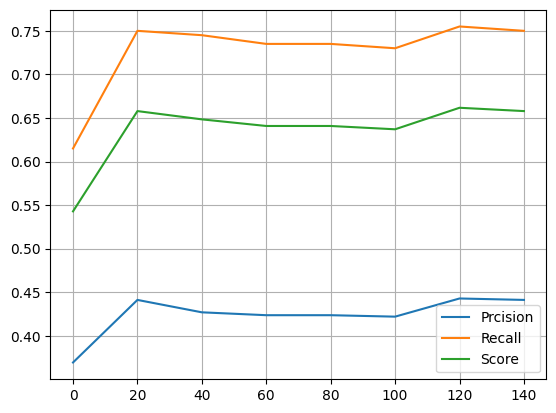

yolov8m no extra data

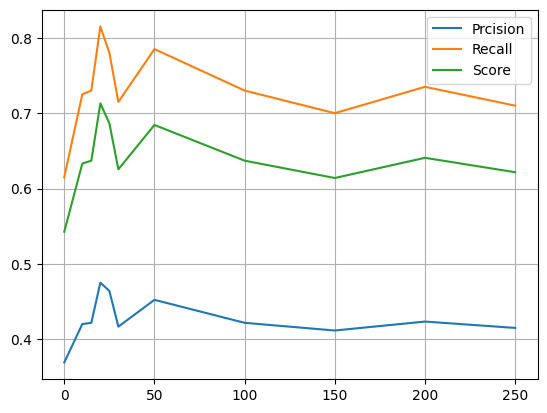

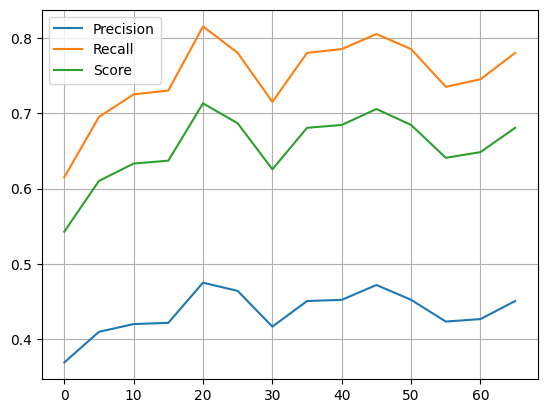

yolov8m no extra data no mosaic

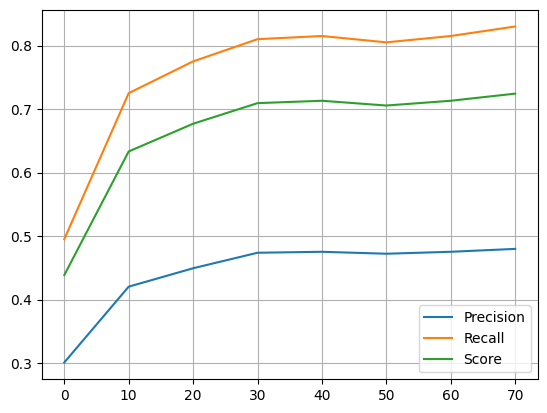

yolov8m no extra data no mosaic no cos_lr

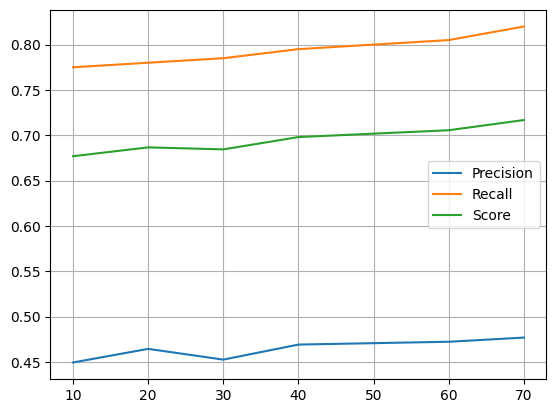

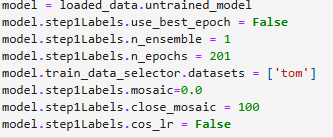

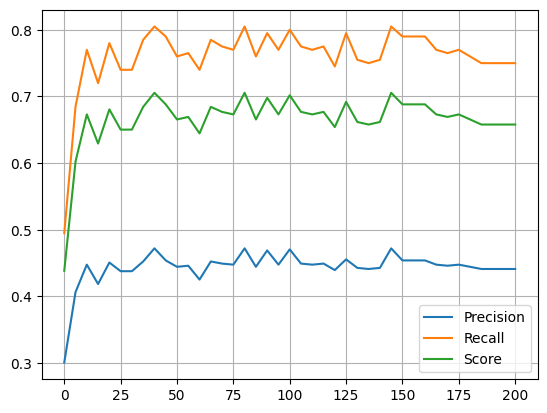

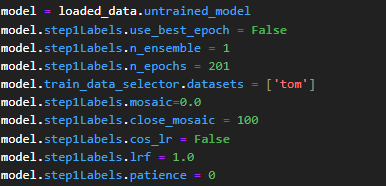

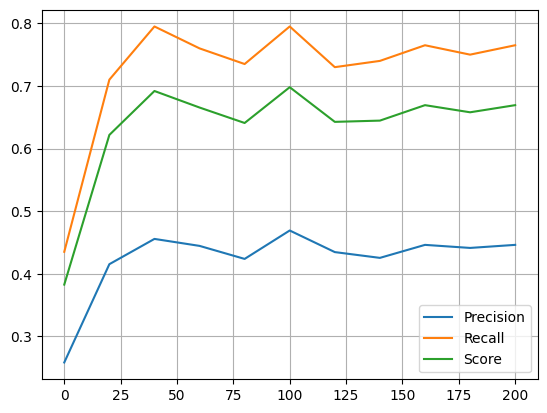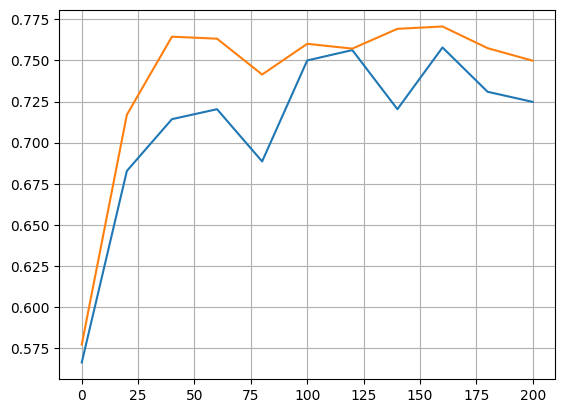

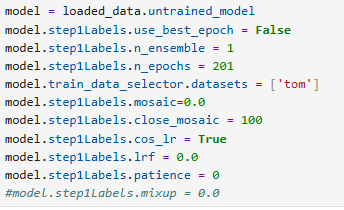

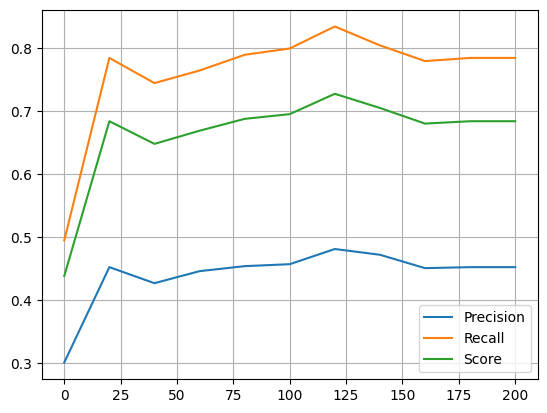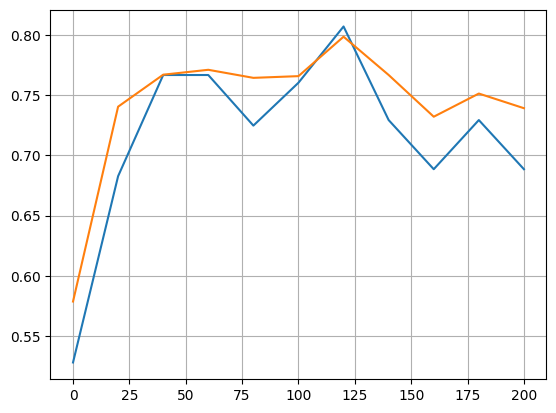

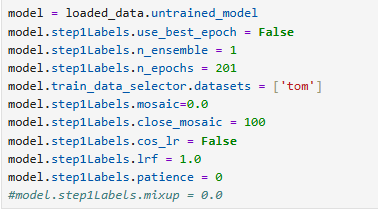

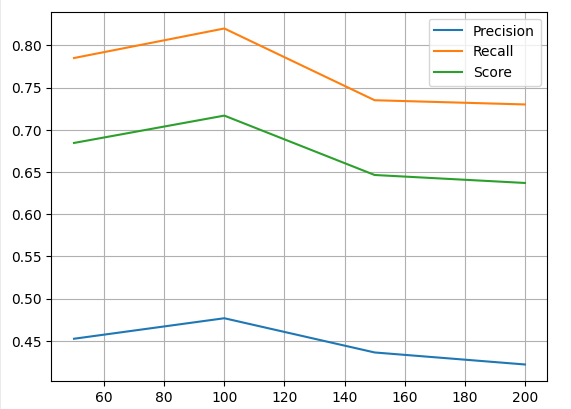

In [ ]:
import subprocess
def do_upload(library_name, local_dir):
    if fls.env=='vast':
        subprocess.run('rm -rf /kaggle_temp', shell=True)
        subprocess.run('mkdir /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets metadata -p /kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cp '+local_dir+' /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets version -p /kaggle_temp/ -m '+'x', shell=True)
    else:
        subprocess.run('cd d:/ && rd /s /q kaggle_temp', shell=True)
        subprocess.run('cd d:/ && d: && mkdir kaggle_temp', shell=True)
        subprocess.run('kaggle datasets metadata -p d:/kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cd d:/kaggle_temp/ && d: && copy '+local_dir+' d:', shell=True)
        subprocess.run('kaggle datasets version -p d:\\kaggle_temp\\ -m '+'x', shell=True)

In [ ]:
#do_upload('jeroencottaar/my-flg-models', fls.temp_dir + '/intermediate_weights/*.*')

In [ ]:
model.step1Labels.trained_model[0]